# root locus plots and frequency responses

In [108]:
from scipy import signal
import numpy as np
from numpy import pi, log10
import matplotlib.pyplot as plt
from matplotlib import patches
import collections as coll

In [159]:
def pid(k_i, k_p, k_d, plot=False):
    """
    Parameters
    ----------
    k_i : integral gain (at nyquist)
    k_p : proportional gain (constant)
    k_d : derivative gain (at nyquist)
    Returns
    -------
    ba : vector of b and a coefficients in format: [b0,b1,b2,a1,a2]
    """

    i = 10**(k_i/20)*np.pi
    p = 10**((k_p)/20)
    d = 10**(k_d/20)/(np.pi)
    
    print(i,p,d)

    ba = [0,0,0,0,0]
    ba[0] = i + p + d
    ba[1] = -(p + 2*d)
    ba[2] = d
    ba[3] = 1

    if plot:
        plt.figure(1)
        w, h = signal.freqz(ba[:3], [1] + [-x for x in ba[3:]], 2 ** 20)
        h = 20 * np.log10(np.abs(h))
        plt.plot(w, h)
        plt.xscale('log')
    return ba

In [124]:
def zplane(_zeros_arr, _poles_arr, _ax=None, _fig=None):
    """Plot the complex z-plane given zeros and poles."""

    # get a figure/plot
    if _ax is None:
        _fig, _ax = plt.subplots(1)

    # Add unit circle and zero axes
    unit_circle = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    _ax.add_patch(unit_circle)
    _ax.axvline(0, color='0.7')
    _ax.axhline(0, color='0.7')

    # Plot the poles and set marker properties
    poles_plt = _ax.plot(_poles_arr.real, _poles_arr.imag, 'x', markersize=9, alpha=0.5)

    # Plot the zeros and set marker properties
    zeros_plt = _ax.plot(_zeros_arr.real, _zeros_arr.imag, 'o', markersize=6, 
                         markeredgecolor=poles_plt[0].get_color())      # same color as poles

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(_zeros_arr), abs(_poles_arr), [1])))
    _ax.axis('scaled')
    _ax.axis([-r, r, -r, r])

    _ax.set_title('Poles and zeros')
    _ax.grid(True, color='0.9', linestyle='-', which='both', axis='both')

    def count_zp_multiplicity(pz_plt):
        """Count zeros and poles multiplicity"""
        # If there are multiple poles or zeros at the same point, put a superscript next to them.
        # TODO: can this be made to self-update when zoomed?
        # dict keys should be ints for matching
        # but coords should be floats for keeping location of text accurate while zooming

        # Finding duplicates by same pixel coordinates (hacky for now):
        pz_coord_xy = _ax.transData.transform(np.vstack(pz_plt[0].get_data()).T)

        d = coll.defaultdict(int)
        coords = coll.defaultdict(tuple)
        for xy in pz_coord_xy:
            key = tuple(xy.round().astype('int'))
            d[key] += 1
            coords[key] = xy
        for key, value in d.items():
            if value > 1:
                _x, _y = _ax.transData.inverted().transform(coords[key])
                _ax.text(_x, _y, r' ${}^{' + str(value) + '}$', fontsize=13)

    count_zp_multiplicity(poles_plt)
    count_zp_multiplicity(zeros_plt)

    return _fig, _ax

# sweep kp

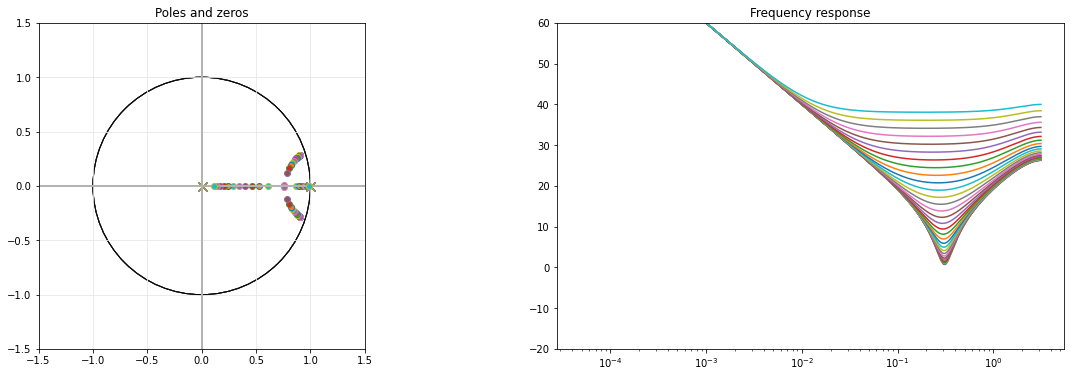

In [125]:
k_i = 0
k_d = 20
k_p = np.arange(-20,40, 2).tolist()

fig, ax = plt.subplots(1,2, figsize=(20,6))
for l in k_p:
    ba = pid(k_i, l, k_d)
    ba[3] = -ba[3]
    ba[4] = -ba[4]
    z, p, k = signal.tf2zpk(ba[:3],[1.0]+ba[3:])
    fig, ax[0] = zplane(z, p, ax[0], fig)
    w, h = signal.freqz(ba[:3], [0.999999999999] + [x for x in ba[3:]], 2 ** 16)
    h = 20 * np.log10(np.abs(h))
    ax[1].plot(w, h)
    ax[1].set_xscale('log')
    ax[1].set_ylim(-20, 60)
    ax[1].set_title('Frequency response')
plt.show()

# sweep ki

0.031415926535897934 3.1622776601683795 100.65842420897408
0.03955030825110062 3.1622776601683795 100.65842420897408
0.04979088810160308 3.1622776601683795 100.65842420897408
0.06268301430690797 3.1622776601683795 100.65842420897408
0.07891323959882376 3.1622776601683795 100.65842420897408
0.099345882657961 3.1622776601683795 100.65842420897408
0.1250690562352286 3.1622776601683795 100.65842420897408
0.15745261312364298 3.1622776601683795 100.65842420897408
0.19822109581474998 3.1622776601683795 100.65842420897408
0.24954557467487512 3.1622776601683795 100.65842420897408
0.3141592653589793 3.1622776601683795 100.65842420897408
0.3955030825110061 3.1622776601683795 100.65842420897408
0.4979088810160308 3.1622776601683795 100.65842420897408
0.6268301430690797 3.1622776601683795 100.65842420897408
0.7891323959882378 3.1622776601683795 100.65842420897408
0.9934588265796102 3.1622776601683795 100.65842420897408
1.2506905623522857 3.1622776601683795 100.65842420897408
1.5745261312364298 3.16

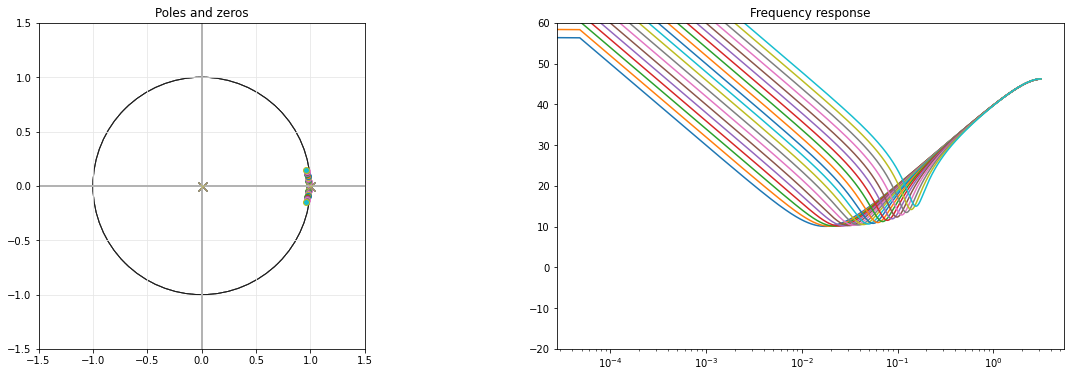

In [162]:
k_i = np.arange(-40, 0, 2).tolist()
k_d = 50
k_p = 10


fig, ax = plt.subplots(1,2, figsize=(20,6))
for l in k_i:
    ba = pid(l, k_p, k_d)
    ba[3] = -ba[3]
    ba[4] = -ba[4]
    z, p, k = signal.tf2zpk(ba[:3],[1.0]+ba[3:])
    fig, ax[0] = zplane(z, p, ax[0], fig)
    w, h = signal.freqz(ba[:3], [0.999999999999] + [x for x in ba[3:]], 2 ** 16)
    h = 20 * np.log10(np.abs(h))
    ax[1].plot(w, h)
    ax[1].set_xscale('log')
    ax[1].set_ylim(-20, 60)
    ax[1].set_title('Frequency response')
    ax[1].grid()
plt.show()

# sweep kd

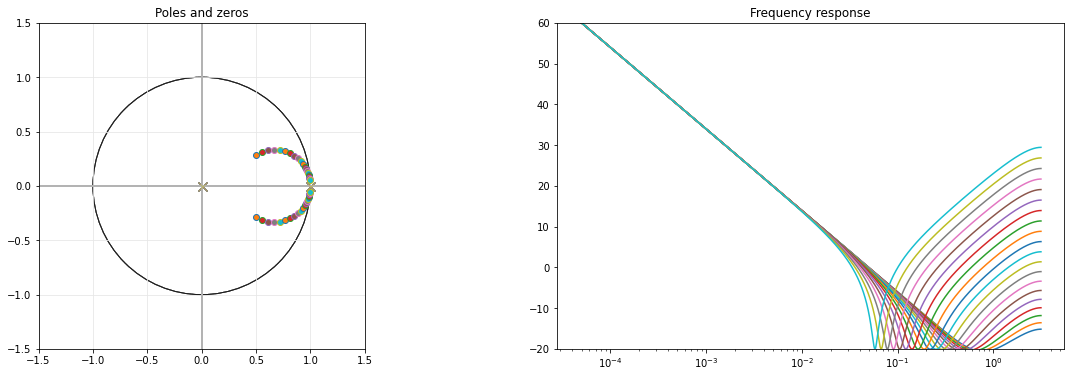

In [107]:
k_i = -20
k_d = np.arange(-20,20, 2).tolist()
k_p = -20

fig, ax = plt.subplots(1,2, figsize=(20,6))
for l in k_d:
    ba = pid(k_i, k_p, l)
    ba[3] = -ba[3]
    ba[4] = -ba[4]
    z, p, k = signal.tf2zpk(ba[:3],[1.0]+ba[3:])
    fig, ax[0] = zplane(z, p, ax[0], fig)
    w, h = signal.freqz(ba[:3], [0.999999999999] + [x for x in ba[3:]], 2 ** 16)
    h = 20 * np.log10(np.abs(h))
    ax[1].plot(w, h)
    ax[1].set_xscale('log')
    ax[1].set_ylim(-20, 60)
    ax[1].set_title('Frequency response')
plt.show()

/home/norman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


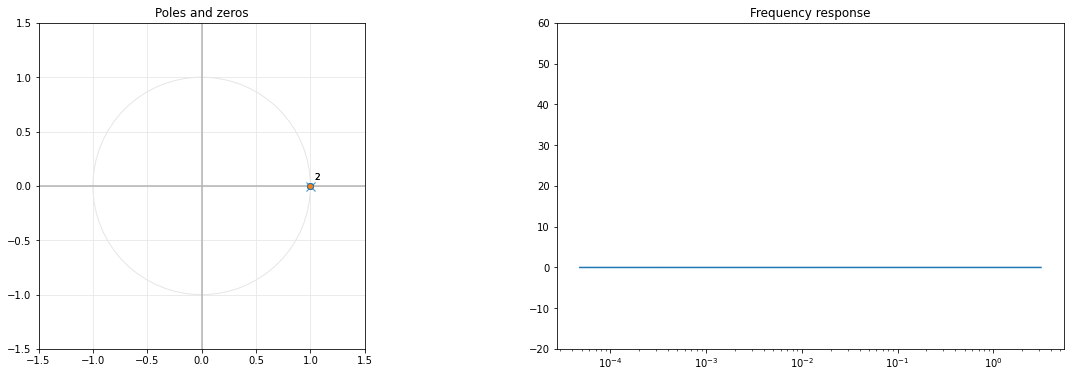

In [75]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
ba = [1,-2,1,2,-1]
ba[3] = -ba[3]
ba[4] = -ba[4]
z, p, k = signal.tf2zpk(ba[:3],[1.0]+ba[3:])
fig, ax[0] = zplane(z, p, ax[0], fig)
w, h = signal.freqz(ba[:3], [0.999999999999] + [x for x in ba[3:]], 2 ** 16)
h = 20 * np.log10(np.abs(h))
ax[1].plot(w, h)
ax[1].set_xscale('log')
ax[1].set_ylim(-20, 60)
ax[1].set_title('Frequency response')
plt.show()

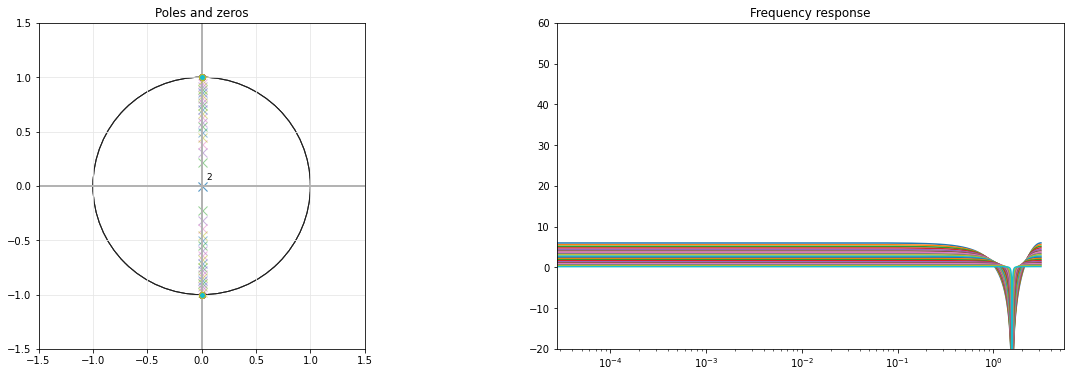

In [8]:
a2 = np.arange(0,1, 0.05).tolist()

fig, ax = plt.subplots(1,2, figsize=(20,6))
for l in a2:
    ba = [1,1e-10,1,0,l]
    z, p, k = signal.tf2zpk(ba[:3],[1.0]+ba[3:])
    fig, ax[0] = zplane(z, p, ax[0], fig)
    w, h = signal.freqz(ba[:3], [0.999999999999] + [x for x in ba[3:]], 2 ** 16)
    h = 20 * np.log10(np.abs(h))
    ax[1].plot(w, h)
    ax[1].set_xscale('log')
    ax[1].set_ylim(-20, 60)
    ax[1].set_title('Frequency response')
plt.show()